In [1]:
%matplotlib inline 
# 윗줄은 주피터에서만 함. 파이참에서 할 필요 없음
import matplotlib.pyplot as plt # 시각화
import mglearn # 학습도움
# 랜덤 사이즈를 채운 후 행렬제곱을 하면 => 정방, 대칭행렬
# 고유값분해 = 고유치, 고유벡터(정직교)
# MDS 행렬곱( 직교하는 2,3차원) : 2차원이나 3차원 특징 추출
# forward propagation 순전파: 예측분류과정 (가중치가 random하게 초기화)
# backward propagation 역전파: 가중치 학습 과정 (cost function 기울기, learning rate)
# MLP: Multi Layer Perception: FFNN(Feed Forward Neural Network)
# solver: 미분, learning-rate 조절 => 가중치를 조절
# estimator, transformer
from sklearn.neural_network import MLPClassifier # MLPRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y= make_moons(n_samples=100, noise=0.25, random_state=3)

C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성 1')

C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


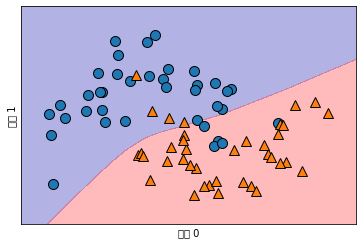

In [2]:
# stratify: 층화변수선택법
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)
# Multi layer => XOR 문제를 해결, 레이어가 많으면 정밀도 자동으로 높아짐
mlp = MLPClassifier(random_state=0).fit(X_train, y_train) # 가중치 완성 - MLPClassifier가 레이어를 자동으로 지정
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


In [3]:
mlp.get_params() # 디폴트 매개변수
# relu: 0 이하를 제거한 활성화 함수(activation function) -> 사용해보니 속도 빨라지더라
# epoch: 1회 반복
# adam: learning-rate를 조절, Momentum을 사용하는 optimizer(=solver, 최적화기)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [4]:
mlp.n_layers_ 

3

In [5]:
mlp.coefs_ # coefficient
# bias: 계수들이 0으로 가는 것을 방지해서 처음에 1로 세팅

[array([[ 1.96423650e-01,  1.86414048e-01,  2.73074871e-02,
          1.32154297e-01, -9.48047217e-05,  2.82807555e-03,
         -7.29479240e-02,  1.45878653e-01,  2.97837159e-01,
         -1.12611776e-01,  2.34714552e-01,  1.30702586e-01,
         -2.85623212e-02,  1.12399918e-01, -1.71442282e-01,
         -3.24829063e-01, -3.85153290e-01,  2.38832765e-01,
          2.13193712e-01,  2.63746115e-01,  1.70653255e-01,
          7.41106685e-02,  1.04573476e-01,  6.73150355e-02,
         -3.77696555e-01,  1.10071889e-01,  4.88102808e-03,
          3.03409150e-01, -6.64267214e-02, -1.08723630e-01,
         -2.67443736e-01,  2.19702964e-01, -9.77933350e-02,
          3.95350833e-05, -1.67873856e-01,  1.32818304e-01,
          2.23922646e-02, -1.13671191e-02,  2.94106612e-01,
          3.48486041e-02, -1.28573692e-01, -1.62111791e-05,
          1.34093216e-01, -3.48957410e-01,  1.73951614e-01,
          2.50280090e-02, -3.77490782e-01, -3.22208104e-01,
         -8.09493846e-02, -4.14861544e-0

In [6]:
mlp.classes_

array([0, 1], dtype=int64)

In [7]:
mlp.n_outputs_

1

Text(0, 0.5, '특성 1')

C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


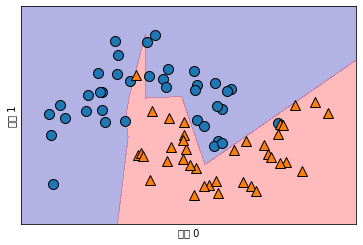

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [9]:
mlp.coefs_ # 2 x 10, bias가 10개

[array([[ -4.9818262 ,  22.94559802,  11.2952523 ,  42.91350414,
          -0.10638399,  12.450265  ,  -0.08696973,  18.40556868,
           5.91473827,  -0.09957052],
        [  2.76470468, -10.24958482,   2.03364121,  -6.10960884,
          -0.59774414,  -0.57889683,  -0.66855653,  -2.51508397,
         -16.13762386,  -1.56805821]]), array([[ -7.44132317],
        [ 14.92540772],
        [ -9.50395538],
        [-16.8715502 ],
        [ -0.70036373],
        [  4.49798076],
        [  0.16314654],
        [ 24.89345945],
        [ -8.48263277],
        [ -2.66394106]])]

Text(0, 0.5, '특성 1')

C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


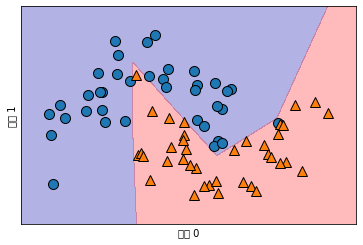

In [10]:
# 레이어를 10개 이상 주면 기울기 소실 문제
# 멀티레이어: XOR 문제 해결, 정확도가 높아지는 것을 발견
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[5,10]) # 10x10에서 가중치는 2차원인데 
# SVM의 논리: 고차원으로 데이터 확대(고차원을 선호하는 모델)
    # 정확도 높음
    # 과적합 방지: 중앙선을 찾아가기 때문에 한쪽에 치우지지 않음.
    # SVC(Classifier), SVR(Regressor)
# hidden layer size: 출력 차수 지정(추출할 특징 수)
# 2x10, 10x10
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [11]:
# BLACKBOX => 원인 규명
mlp.coefs_
# 2x10 bias가 10
# 변수는 2x10, 10x10
# 10으로 나감
# 레이어 사이즈를 지정 출력차수만 지정(5,10): 입력 데이터
# 2 x 5, 5 x10

[array([[  9.58312525,   8.01326616,   6.38324831, -13.90108441,
          -0.14108705],
        [ -0.15831136,   3.390681  ,   2.98670712,  -1.16530986,
          -0.21540178]]),
 array([[-1.02891626, -2.33889475,  2.12972828,  0.52897872,  2.23957507,
          1.41874928,  0.148644  ,  0.34437075,  7.28226381, -0.48186345],
        [-0.81302935, -0.46973462, -0.01110334, -0.25503688, -0.09567239,
          1.07167377,  2.44161204,  0.06323068,  3.11978885, -0.63798754],
        [-0.40855756, -1.01425374,  1.89146083,  0.85156843,  2.19939312,
          1.2517127 , -2.10707856,  0.65408844,  1.40739894,  0.20930688],
        [-0.68852893,  2.66493476, -1.5262621 ,  0.33742273, -3.40176253,
         -2.50208501, -0.81709543,  3.96204422,  0.37740612, -0.58969023],
        [-0.4275745 ,  0.19328921, -0.31145316, -0.04253044, -0.32264591,
         -0.43052851, -0.49187581,  0.19735584, -0.45677027, -0.38304485]]),
 array([[-0.65227553],
        [-3.54750216],
        [-3.3272718 ],
    

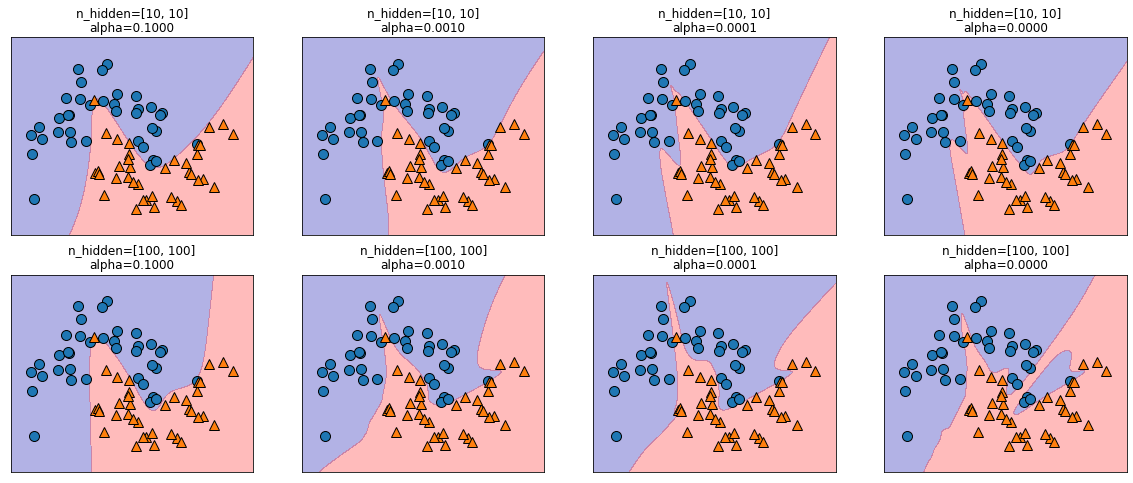

In [12]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.1,0.001,0.0001,0.00001]):
        mlp = MLPClassifier(solver = 'lbfgs', random_state=0, 
                            activation = 'tanh', 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))
        
# 규제(alpha)가 작아지면 과적합됨(곡선이 심해짐)

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최대값: \n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42) # 디폴트
mlp.fit(X_train, y_train) # 가중치 결정
print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train))) # 94%
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test))) # 92% traindata 정확도가 더 작다면 과소적합. -> 데이터 늘려줘야함
mlp

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
mean_on_train = X_train.mean(axis=0) # 평균
std_on_train = X_train.std(axis=0) # 표준편차
# Z점수 표준화
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\ICT01_04\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
mlp = MLPClassifier(max_iter = 1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train))) # 100%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) # 97#
# 두 정확도가 일치하는게 좋기 때문에 이건 안좋은 케이스

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [17]:
mlp = MLPClassifier(max_iter = 1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train))) # 98.8%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) # 97.2%

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [18]:
mlp.coefs_

[array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
         -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
        [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
         -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
        [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
         -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
        ...,
        [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
         -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
        [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
         -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
        [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
         -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]]),
 array([[-0.09540798],
        [ 0.23756701],
        [-0.19771946],
        [ 0.30384496],
        [ 0.16202467],
        [-0.00111623],
        [ 0.18081763],
        [ 0.08990004],
        [ 0.2707616 ],
        [-0.26194311],

C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45787 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_04\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 4576

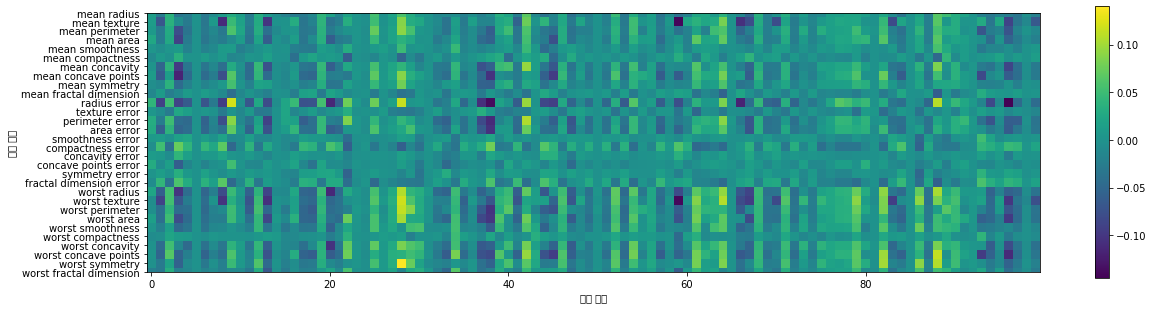

In [19]:
plt.figure(figsize = (20,5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

In [56]:
import pandas as pd

wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8") 
wine

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [57]:
wine.shape # 178x14 # 분류: 독립변수와 종속변수

(178, 14)

In [58]:
X = wine.drop('Cultivator', axis = 1) ########################################################### 왜 cultivator?
y = wine['Cultivator']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y) # 75%:25%

In [60]:
print(y.unique())

[1 2 3]


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #StandardScaler(copy=True 원본그대로둬라, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.neural_network import MLPClassifier
# 디폴트 hidden_layer_sizes(100,)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# precision 정밀도 : TP/(TP+FP) - 예측을 중심으로 생각
# recall 재현율 : TP/(TP+TN) - 실제값을 중심으로 생각
# f1_score = 2 * precision * recall / (precision + recall)
# support: 전체 개수 중 맞은 개수
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# 1,2,3 - 3개의 값이 나옴 == unique 결과 값과 같음
# macro avg: 평균
# weighted avg: 가중평균


[[20  0  0]
 [ 0 14  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.88      0.93        16
           3       0.82      1.00      0.90         9

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.94        45
weighted avg       0.96      0.96      0.96        45



(13, 30)
(30, 30)
(30, 30)


Text(0, 0.5, '입력 특성')

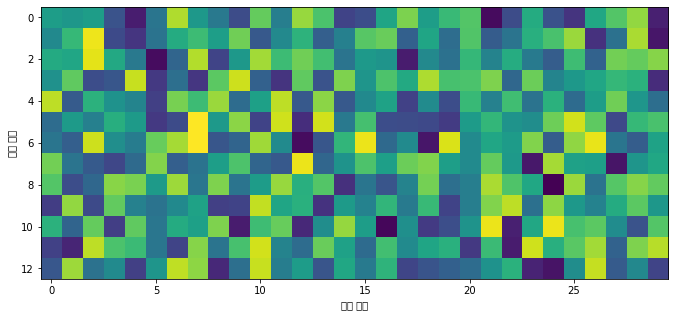

In [65]:
print(mlp.coefs_[0].shape) # (13, 30) 
print(mlp.coefs_[1].shape)
print(mlp.coefs_[2].shape)
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap='viridis')
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
# plt.colorbar()

In [66]:
# NMF(Non-negative Matrix Factorization): 비음수 행렬 분해
- PCA는 음수와 양수의 차이를 상계해서 처리
- 양수인 데이터에 적용: 음성데이터, signal

SyntaxError: invalid syntax (<ipython-input-66-f1d589af6d07>, line 2)

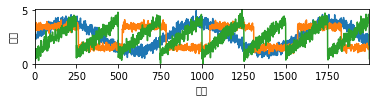

In [73]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (6,1))
plt.plot(S, '-')
plt.xlabel('시간')
plt.ylabel('신호')
plt.margins(0)

In [75]:
# 노이즈: 전송 데이터
import numpy as np
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

측정 데이터 형태: (2000, 100)


In [76]:
from sklearn.decomposition import NMF, PCA
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

복원한 신호 데이터 형태: (2000, 3)


In [80]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

In [81]:
# plot 내 한글 깨질때 사용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

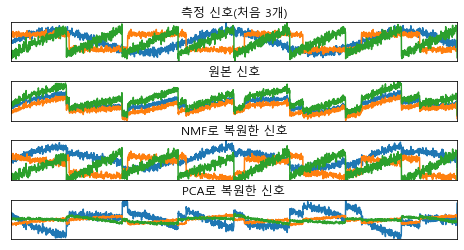

In [82]:
models = [S, X, S_, H] # [원본, 노이즈, NMF, PCA]
# 양수 데이터는 노이즈를 제거하지 못함 -> NMF 쓰는 게 낫다
names=['측정 신호(처음 3개)', '원본 신호', 'NMF로 복원한 신호','PCA로 복원한 신호']
fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks': (), 'yticks':()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

In [ ]:
# 군집분석